**Task 2:**

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

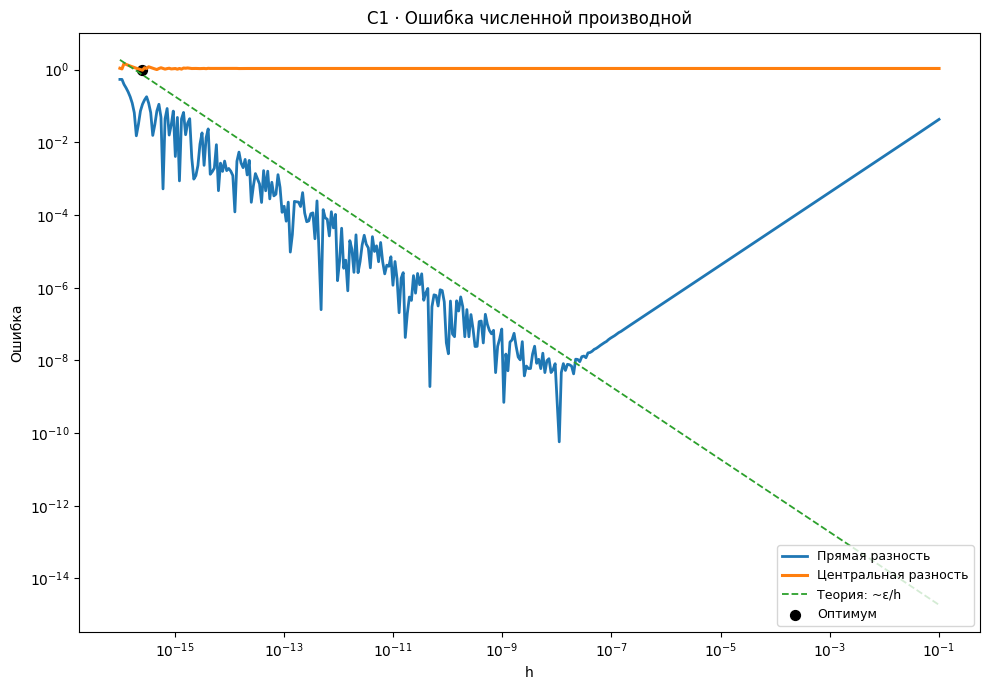

In [15]:
# ==========================
# C1 · ДЗ: Истинная точность численной производной
# ==========================


x0 = 1
f = np.sin
df = np.cos
true = df(x0)
eps = np.finfo(float).eps
h = np.logspace(-16, -1, 400)


# TODO
def forward_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x + h) - f(x)) / h
    #raise NotImplementedError
    return deriv


# TODO
def central_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x - h) - f(x + h)) / (2 * h)
    #raise NotImplementedError
    return deriv


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК!!!
def theory_lines(h, x0=x0):
    """Оценки ошибок усечения и округления"""
    C_trunc = abs(np.cos(x0)) / 6
    C_round = abs(np.sin(x0)) * eps
    round_line = C_round / h
    return round_line


def make_figure():
    approx_f = forward_diff(f, x0, h)
    approx_c = central_diff(f, x0, h)
    err_f = np.abs(approx_f - true)
    err_c = np.abs(approx_c - true)
    round_line = theory_lines(h)
    imin = np.argmin(err_c)
    plt.figure(figsize=(10, 7))
    sns.lineplot(x=h, y=err_f, label="Прямая разность", lw=2)
    sns.lineplot(x=h, y=err_c, label="Центральная разность", lw=2.2)
    plt.loglog(h, round_line, '--', label="Теория: ~ε/h", lw=1.3)
    plt.scatter([h[imin]], [err_c[imin]], s=50, color='black', label="Оптимум")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("h")
    plt.ylabel("Ошибка")
    plt.title("C1 · Ошибка численной производной")
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()
    plt.show()
    
make_figure()

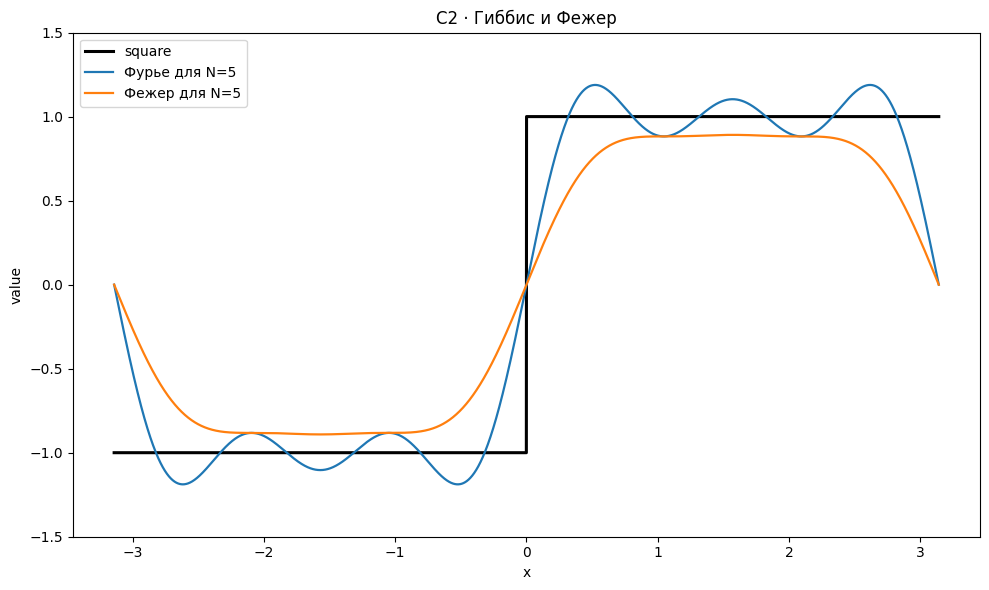

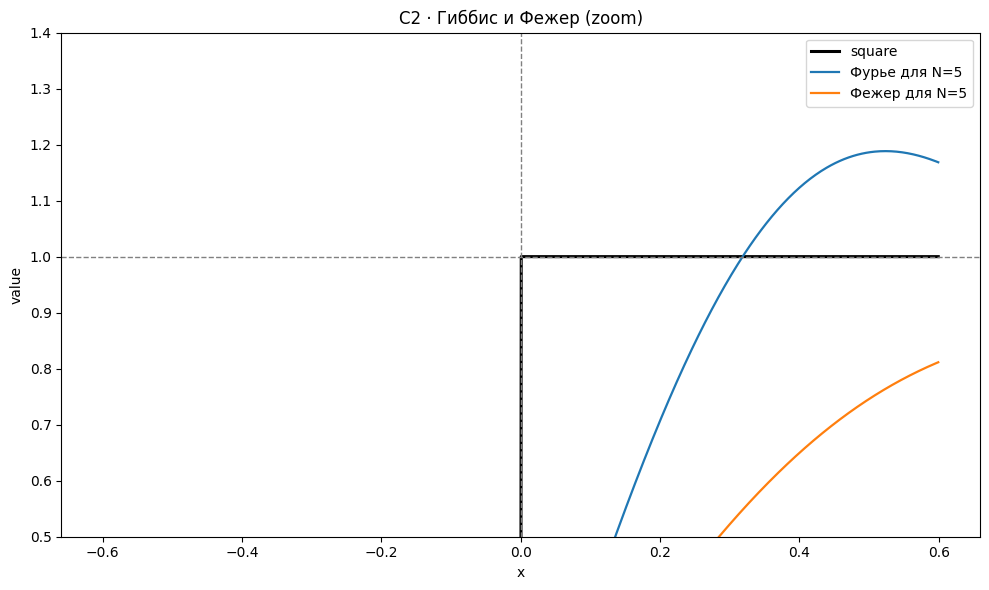

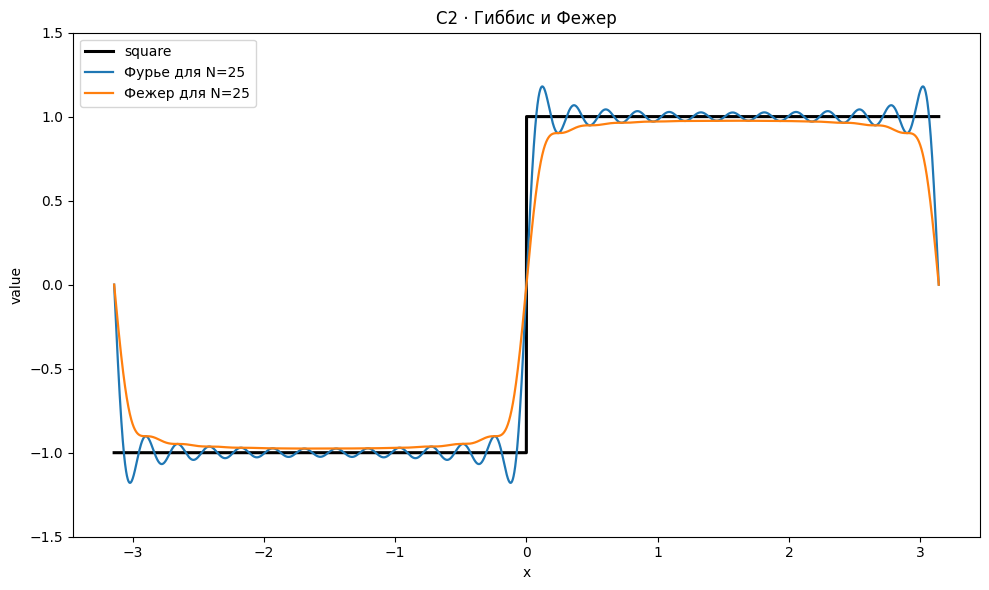

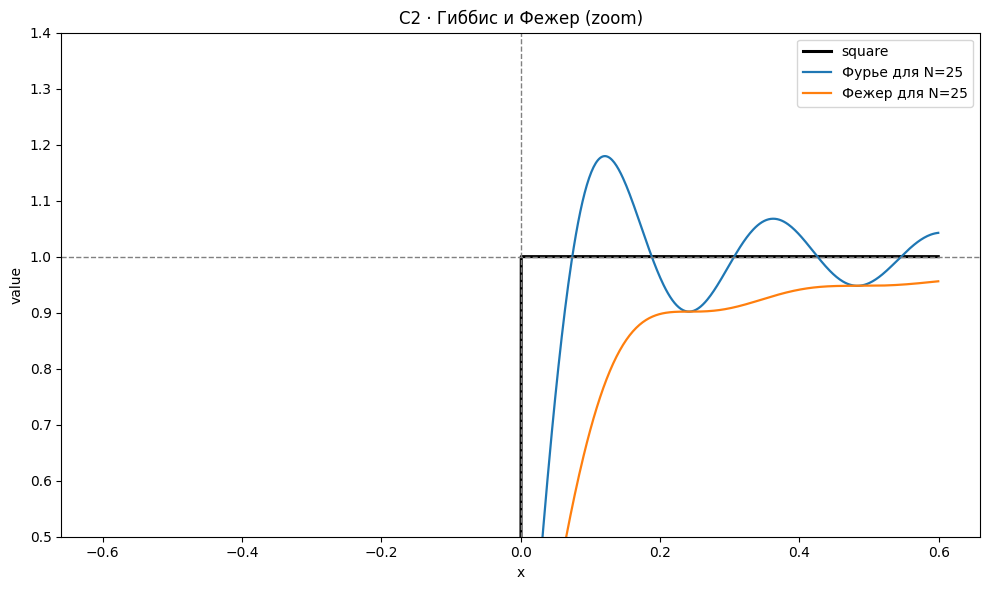

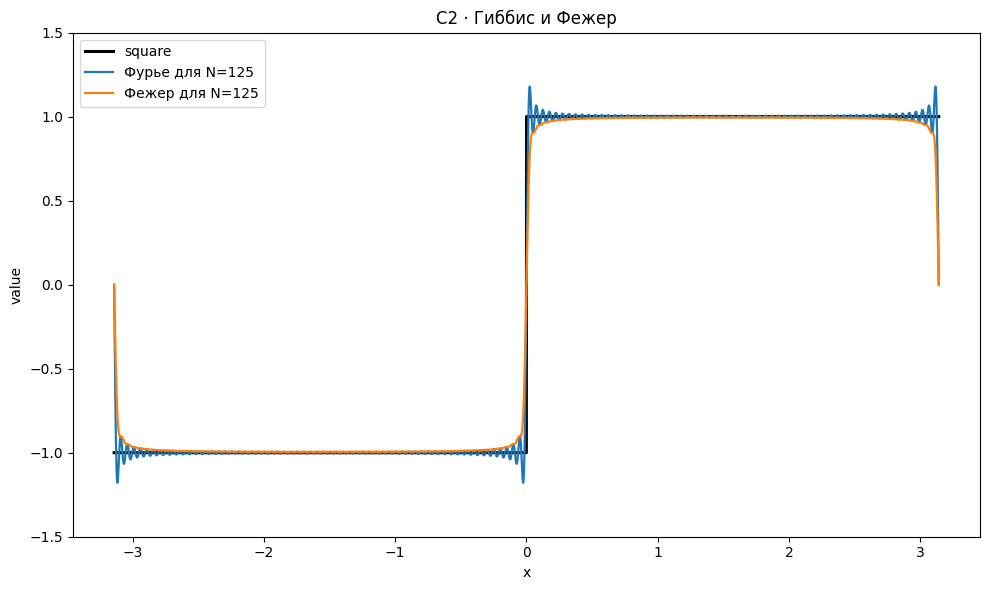

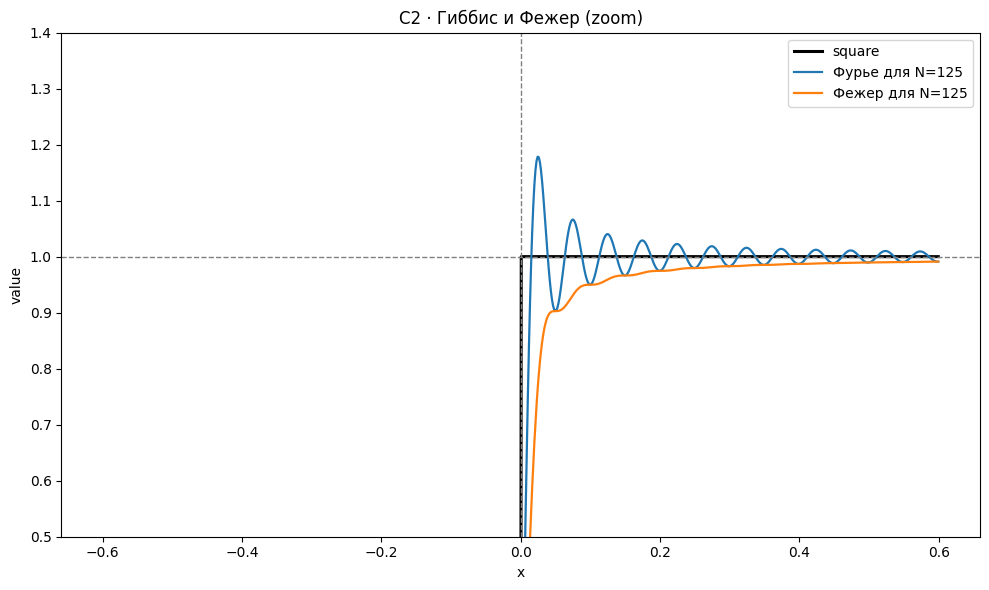

In [85]:
# ==========================
# C2 · ДЗ: Феномен Гиббса и сумма Фежера
# ==========================


#TODO
def square_wave(x: np.ndarray):
    """Идеальная квадратная волна (±1)."""
    y_true: np.ndarray = np.where(x > 0, 1, -1)
    return y_true


#TODO
def fourier_square_wave(x: np.ndarray, N: int) -> np.ndarray:
    """Реализация формулы ряда Фурье для квадратной волны."""
    y_true: np.ndarray = np.zeros(len(x))
    for k in range(1, N + 1, 2):
        y_true += 4 / np.pi * (np.sin(k * x) / k)
    return y_true


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def fejer_sum_square(x, N):
    ks = np.arange(1, N + 1, 2)
    weights = 1 - ks / (N + 1.0)
    s = np.sum(weights[:, None] * (np.sin(np.outer(ks, x))/ks[:, None]), axis=0)
    return (4 / np.pi) * s

    
def plot_pair(N, zoom=False):
    x = np.linspace(-np.pi, np.pi, 4000)
    y_true = square_wave(x)
    yN = fourier_square_wave(x, N)
    yF = fejer_sum_square(x, N)
    if zoom:
        mask = (x > -0.6) & (x < 0.6)
        x, y_true, yN, yF = x[mask], y_true[mask], yN[mask], yF[mask]
        
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, linewidth=2.2, label="square", color="black")
    plt.plot(x, yN, linewidth=1.6, label=f"Фурье для N={N}")
    plt.plot(x, yF, linewidth=1.6, label=f"Фежер для N={N}")
    if not zoom:
        plt.ylim(-1.5, 1.5)
    else:
        plt.ylim(0.5, 1.4)
        plt.axhline(1.0, color="gray", linewidth=1.0, linestyle="--")
        plt.axvline(0.0, color="gray", linewidth=1.0, linestyle="--")
    plt.xlabel("x"); plt.ylabel("value")
    plt.title("C2 · Гиббис и Фежер (zoom)" if zoom else "C2 · Гиббис и Фежер")
    plt.legend()
    plt.tight_layout()
    plt.show()

              
# Пример:
for N in [5, 25, 125]:
    plot_pair(N, zoom=False)
    plot_pair(N, zoom=True)

In [86]:
# ==========================
# C3 · ДЗ: Число итераций до сходимости метода Ньютона
# ==========================
#TODO
def newton_iterations(Z, max_iter=80, tol=1e-8):
    """
    Итерации Ньютона:
    z ← z − (z³ − 1) / (3z²)
    Проверяем сходимость к трём корням {1, e^{±2πi/3}}.
    Возвращает матрицу числа итераций до сходимости.
    """
    results: np.ndarray = np.zeros(len(Z))
    z1 = 1
    z2 = np.cos(2 * np.pi / 3) + 1j * np.sin(2 * np.pi / 3)
    z3 = np.cos(2 * np.pi / 3) - 1j * np.sin(2 * np.pi / 3)
    for k in range(len(Z)):
        z = Z[k]
        for i in range(max_iter):
            z_new = z - (z**3 - 1) / (3 * z**2)
            if np.abs(z_new - z) < tol:
                results[k] = i + 1
                break
            z = z_new

    return results


def make_figure():
    n = 700
    xs = np.linspace(-1.5, 1.5, n)
    ys = np.linspace(-1.5, 1.5, n)
    X, Y = np.meshgrid(xs, ys)
    Z = X + 1j * Y
    steps = newton_iterations(Z)
    A = steps.astype(float)
    A[A == 0] = np.nan
    plt.figure(figsize=(9, 9))
    plt.imshow(A, origin="lower", extent=(xs[0], xs[-1], ys[0], ys[-1]),
                                interpolation="nearest", cmap="viridis")
    plt.title("C3 · Число итераций до сходимости метода Ньютона\nдля z³ − 1 = 0")
    plt.xlabel("Re z"); plt.ylabel("Im z")
    plt.colorbar(label="итераций", shrink=0.8)
    plt.tight_layout()
    plt.show()

make_figure()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()